## LinearRegression Class Implementation

In [267]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

## Loading & Splitting Dataset

In [276]:
import pandas as pd
import math
import matplotlib.pyplot as plt

def train_test_split(X, Y):
    dataset_length = len(Y)
    test_size = 0.2
    train_length = math.ceil(dataset_length * (1 - test_size))
    return X[:train_length], X[train_length:], Y[:train_length], Y[train_length:]

df = pd.read_csv('house_data.csv')

X = np.array(df[['sqft_living']])
Y = np.array(df['price'])


x_train, x_test, y_train, y_test = train_test_split(X, Y)

## Plotting The Original Dataset

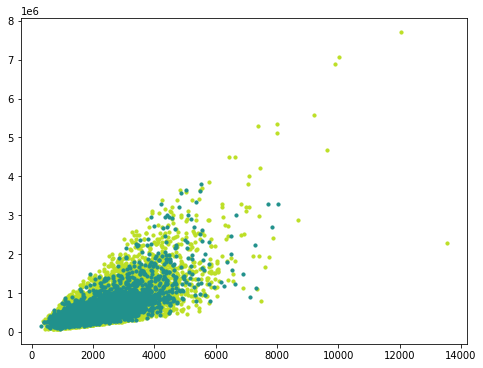

In [307]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)
plt.show()

## Training & Testing The Model

In [308]:
regressor = LinearRegression(lr=0.0000001)
regressor.fit(x_train, y_train)

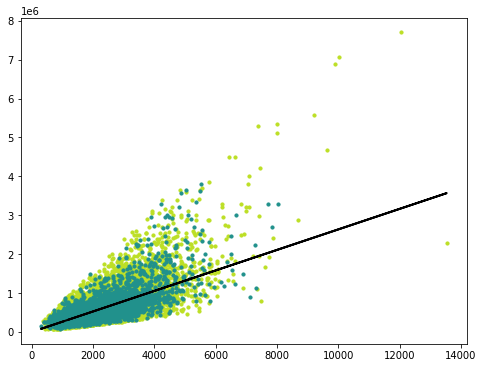

In [309]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(x_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(x_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="prediction")
plt.show()